In [5]:
import os
import sys
import gensim
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.regularizers import l1

ROOT = os.path.dirname(os.getcwd())
#path_data = os.path.join(ROOT, 'data')
path_data = 'C:\\Users\\joris\\Documents\\eScience_data\\data'
sys.path.insert(0, ROOT)
sys.path.insert(0, "C:\\Users\\joris\\Documents\\eScience_data\\spec2vec_gnps_data_analysis\\custom_functions")

## Loading data ready for training
-Creation of this data can be seen in 3b

In [7]:
# training set
outfile = os.path.join(path_data, 'nn_prep_training_found_matches_s2v_2dec.pickle')
print(outfile)
if os.path.exists(outfile):
    with open(outfile, 'rb') as inf:
        nn_prep_training_found_matches_s2v_2dec = pickle.load(inf)
else:
    nn_prep_training_found_matches_s2v_2dec = find_info_matches(old_and_unique_found_matches_s2v_2dec_top20,
                                                                old_and_unique_documents_library_s2v_2dec,
                                                                old_and_unique_documents_query_s2v_2dec,
                                                                max_parent_mass=max_parent_mass)
    with open(outfile, 'wb') as outf:
        pickle.dump(nn_prep_training_found_matches_s2v_2dec, outf)

C:\Users\joris\Documents\eScience_data\data\nn_prep_training_found_matches_s2v_2dec.pickle


In [8]:
outfile = os.path.join(path_data, 'nn_prep_testing_found_matches_s2v_2dec.pickle')
print(outfile)
if os.path.exists(outfile):
    with open(outfile, 'rb') as inf:
        nn_prep_testing_found_matches_s2v_2dec = pickle.load(inf)
else:
    nn_prep_testing_found_matches_s2v_2dec = find_info_matches(new_and_unique2_found_matches_s2v_2dec_top20,
                                                                new_and_unique2_documents_library_s2v_2dec,
                                                                new_and_unique2_documents_query_s2v_2dec,
                                                                max_parent_mass=max_parent_mass)
    with open(outfile, 'wb') as outf:
        pickle.dump(nn_prep_testing_found_matches_s2v_2dec, outf)

C:\Users\joris\Documents\eScience_data\data\nn_prep_testing_found_matches_s2v_2dec.pickle


In [9]:
nn_prep_testing_found_matches_s2v_2dec[2].iloc[:5]

,cosine_score,cosine_matches,mod_cosine_score,mod_cosine_matches,s2v_score,label,similarity,parent_mass,mass_sim
22101,0.928457,0.663299,0.928457,0.663299,0.909346,1,1.000000,0.034743,0.999777
20538,0.856661,0.549896,0.856661,0.549896,0.859138,1,1.000000,0.034743,1.000000
22454,0.857507,0.549896,0.857507,0.549896,0.674490,1,1.000000,0.034743,1.000000
1366,0.389183,0.549896,0.389183,0.549896,0.584506,1,1.000000,0.034744,0.999554
5998,0.336160,0.070000,0.337487,0.195643,0.303197,0,0.581808,0.037051,0.000997


## Add matches together for each query

In [17]:
# add all the found matches together in one big df
nn_training_found_matches_s2v_2dec = nn_prep_training_found_matches_s2v_2dec[0].append(
    nn_prep_training_found_matches_s2v_2dec[1:])
nn_training_found_matches_s2v_2dec = nn_training_found_matches_s2v_2dec.sample(frac=1)

nn_testing_full_found_matches_s2v_2dec = nn_prep_testing_found_matches_s2v_2dec[0].append(
    nn_prep_testing_found_matches_s2v_2dec[1:])
nn_testing_full_found_matches_s2v_2dec = nn_testing_full_found_matches_s2v_2dec.sample(frac=1)


# take 300 (randomly chosen) query matches for validation set
np.random.seed(42)
first_half = list(np.random.choice(range(0,1000), 250, replace=False))
np.random.seed(42)
second_half = list(np.random.choice(range(1000,2000), 250, replace=False))
val_set = first_half + second_half
nn_val_found_matches_s2v_2dec = pd.DataFrame()
nn_testing_found_matches_s2v_2dec = pd.DataFrame()

for i in range(len(nn_prep_testing_found_matches_s2v_2dec)):
    if i in val_set:
        nn_val_found_matches_s2v_2dec = nn_val_found_matches_s2v_2dec.append(nn_prep_testing_found_matches_s2v_2dec[i])
    else:
        nn_testing_found_matches_s2v_2dec = nn_testing_found_matches_s2v_2dec.append(nn_prep_testing_found_matches_s2v_2dec[i])

nn_val_found_matches_s2v_2dec = nn_val_found_matches_s2v_2dec.sample(frac=1)
nn_testing_found_matches_s2v_2dec = nn_testing_found_matches_s2v_2dec.sample(frac=1)

In [18]:
second_half

[1521,
 1737,
 1740,
 1660,
 1411,
 1678,
 1626,
 1513,
 1859,
 1136,
 1811,
 1076,
 1636,
 1973,
 1938,
 1899,
 1280,
 1883,
 1761,
 1319,
 1549,
 1174,
 1371,
 1527,
 1210,
 1235,
 1101,
 1986,
 1902,
 1947,
 1346,
 1139,
 1621,
 1499,
 1370,
 1198,
 1687,
 1584,
 1901,
 1059,
 1328,
 1096,
 1312,
 1974,
 1299,
 1277,
 1924,
 1601,
 1439,
 1837,
 1570,
 1879,
 1261,
 1578,
 1023,
 1030,
 1617,
 1010,
 1221,
 1820,
 1296,
 1054,
 1542,
 1209,
 1604,
 1692,
 1662,
 1866,
 1070,
 1543,
 1107,
 1493,
 1590,
 1741,
 1292,
 1289,
 1652,
 1039,
 1589,
 1307,
 1679,
 1066,
 1275,
 1067,
 1318,
 1548,
 1998,
 1714,
 1753,
 1327,
 1382,
 1451,
 1522,
 1218,
 1787,
 1436,
 1764,
 1088,
 1063,
 1826,
 1716,
 1351,
 1936,
 1256,
 1635,
 1644,
 1554,
 1959,
 1168,
 1917,
 1528,
 1823,
 1985,
 1816,
 1086,
 1432,
 1184,
 1978,
 1534,
 1294,
 1892,
 1425,
 1713,
 1260,
 1237,
 1559,
 1583,
 1445,
 1867,
 1800,
 1599,
 1849,
 1265,
 1995,
 1529,
 1055,
 1120,
 1215,
 1025,
 1072,
 1044,
 1247,
 1721,

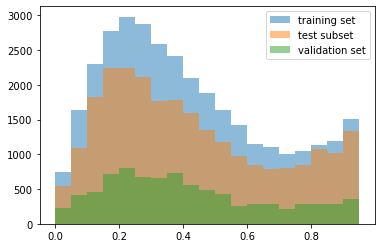

In [19]:
plt.hist(nn_training_found_matches_s2v_2dec['similarity'],
         alpha=0.5, bins = np.arange(0,1,0.05), label = 'training set')
plt.hist(nn_testing_found_matches_s2v_2dec['similarity'],
         alpha=0.5, bins = np.arange(0,1,0.05), label = 'test subset')
plt.hist(nn_val_found_matches_s2v_2dec['similarity'],
         alpha=0.5, bins = np.arange(0,1,0.05), label = 'validation set')
plt.legend()
plt.show()

In [20]:
X_train = nn_training_found_matches_s2v_2dec.drop(['similarity', 'label'], axis = 1)
y_train = nn_training_found_matches_s2v_2dec['similarity']
X_test = nn_testing_found_matches_s2v_2dec.drop(['similarity', 'label'], axis = 1)
y_test = nn_testing_found_matches_s2v_2dec['similarity']
X_val = nn_val_found_matches_s2v_2dec.drop(['similarity', 'label'], axis = 1)
y_val = nn_val_found_matches_s2v_2dec['similarity']

## Load model from notebook 3

In [91]:
#nn function

def train_nn(X_train, y_train, X_test, y_test, layers = [12, 12, 12, 12, 12, 1],
             model_loss = 'binary_crossentropy', activations = 'relu',
             last_activation = 'sigmoid', model_epochs = 20, model_batch_size = 16,
             save_name = False):
    '''Train a keras deep NN and test on test data, returns (model, history, accuracy, loss)
    
    X_train: matrix like object like pd.DataFrame, training set
    y_train: list like object like np.array, training labels
    X_test: matrix like object like pd.DataFrame, test set
    y_test: list like object like np.array, test labels
    layers: list of ints, the number of layers is the len of this list while the elements
        are the amount of neurons per layer, default: [12, 12, 12, 12, 12, 1]
    model_loss: str, loss function, default: binary_crossentropy
    activations: str, the activation of the layers except the last one, default: relu
    last_activation: str, activation of last layer, default: sigmoid
    model_epochs: int, number of epochs, default: 20
    model_batch_size: int, batch size for updating the model, default: 16
    save_name: str, location for saving model, optional, default: False
    
    Returns:
    model: keras sequential
    history: dict, training statistics
    accuracy: float, accuracy on test set
    loss, float, loss on test set
    
    If save_name is not False and save_name exists this function will load existing model
    '''
    if os.path.exists(save_name) and save_name:
        print('\nLoading existing model')
        nn_model = load_model(save_name)
        with open(save_name + '_train_hist.pickle', 'rb') as hist_inf:
            history = pickle.load(hist_inf)
    else:
        # define the keras model
        nn_model = Sequential()
        #add first layer
        nn_model.add(Dense(layers[0], input_dim = X_train.shape[1], activation = activations))
        #add other layers
        for i in range(1,len(layers)-1): #skip first and last one
            nn_model.add(Dense(layers[i], activation = activations))
        #add last layer
        nn_model.add(Dense(layers[-1], activation = last_activation))
        # compile the keras model
        nn_model.compile(loss = model_loss, optimizer='adam', metrics=['accuracy'])
        # fit the keras model on the dataset
        hist = nn_model.fit(X_train, y_train, epochs = model_epochs, batch_size = model_batch_size)
        history = hist.history
    
    #training set
    print('Training loss: {:.4f}\n'.format(history['loss'][-1]))
    
    #test set    
    loss, accuracy = nn_model.evaluate(X_test, y_test)
    print('Test accuracy: {:.2f}'.format(accuracy*100))
    print('Test loss: {:.4f}'.format(loss))
    
    if save_name and not os.path.exists(save_name):
        print('Saving model at:', save_name)
        nn_model.save(save_name)
        with open(save_name + '_train_hist.pickle', 'wb') as hist_outf:
            pickle.dump(history, hist_outf)
    
    return nn_model, history, accuracy, loss

In [92]:
test_layers = [10,24,1]
#model_name = os.path.join(path_data, 'nn_2000_queries_top20_1')
model_name = os.path.join(path_data, 'nn_2000_queries_top20_layers_opt_1') #this one tested best in notebook 3

nn_2000_queries_top20_1 = train_nn(X_train, y_train, X_test, y_test, layers = test_layers,
         model_loss = 'mean_squared_error', activations = 'relu', last_activation = None,
         model_epochs = 50, model_batch_size = 16, save_name = model_name)


Loading existing model
Training loss: 0.0493

30000/30000 [==============================] - 1s 37us/sample - loss: 0.0499 - accuracy: 0.1076
Test accuracy: 10.76
Test loss: 0.0499


## Model trimming
- Simple model
- L1 regularisation
- Dropout regularistion

In [39]:
layers = [48,48,1]
model_name = os.path.join(path_data, "nn_2000_queries_trimming")

# define the keras model
nn_model = Sequential()

#add first layer
nn_model.add(Dense(layers[0], input_dim = X_train.shape[1], activation = 'relu'))
#add other layers
for i in range(1,len(layers)-1): #skip first and last one
    nn_model.add(Dense(layers[i], activation = 'relu'))
#add last layer
nn_model.add(Dense(layers[-1], activation = None))

# compile the keras model
nn_model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mae'])

# save best model
checkpointer = ModelCheckpoint(filepath= model_name + ".hdf5", monitor='val_loss', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)  # patience - try x more epochs to improve val_loss

# fit the keras model on the dataset
hist = nn_model.fit(X_train, y_train, epochs = 100, batch_size = 24, validation_data=(X_val, y_val),
                    callbacks = [checkpointer, earlystopper])
history = hist.history

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39792/40000 [============================>.] - ETA: 0s - loss: 0.0621 - mae: 0.2016
Epoch 00001: val_loss improved from inf to 0.05573, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming.hdf5
40000/40000 [==============================] - 4s 103us/sample - loss: 0.0620 - mae: 0.2015 - val_loss: 0.0557 - val_mae: 0.1902
Epoch 2/100
39576/40000 [============================>.] - ETA: 0s - loss: 0.0568 - mae: 0.1911
Epoch 00002: val_loss improved from 0.05573 to 0.05571, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming.hdf5
40000/40000 [==============================] - 3s 86us/sample - loss: 0.0569 - mae: 0.1912 - val_loss: 0.0557 - val_mae: 0.1871
Epoch 3/100
39816/40000 [============================>.] - ETA: 0s - loss: 0.0555 - mae: 0.1885
Epoch 00003: val_loss improved from 0.05571 to 0.05372, saving model to C:\Users\joris\Documents\eScience_data\data\n

Epoch 55/100
39240/40000 [============================>.] - ETA: 0s - loss: 0.0457 - mae: 0.1658
Epoch 00055: val_loss did not improve from 0.04577
40000/40000 [==============================] - 3s 81us/sample - loss: 0.0457 - mae: 0.1657 - val_loss: 0.0459 - val_mae: 0.1644
Epoch 56/100
39720/40000 [============================>.] - ETA: 0s - loss: 0.0457 - mae: 0.1656
Epoch 00056: val_loss did not improve from 0.04577
40000/40000 [==============================] - 3s 85us/sample - loss: 0.0457 - mae: 0.1656 - val_loss: 0.0477 - val_mae: 0.1688
Epoch 57/100
39912/40000 [============================>.] - ETA: 0s - loss: 0.0456 - mae: 0.1654
Epoch 00057: val_loss did not improve from 0.04577
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0456 - mae: 0.1654 - val_loss: 0.0467 - val_mae: 0.1659
Epoch 58/100
39816/40000 [============================>.] - ETA: 0s - loss: 0.0456 - mae: 0.1654
Epoch 00058: val_loss did not improve from 0.04577
40000/40000 [===========

30000/30000 [==============================] - 1s 43us/sample - loss: 0.0481 - mae: 0.1697


[0.04813166537086169, 0.16970219]

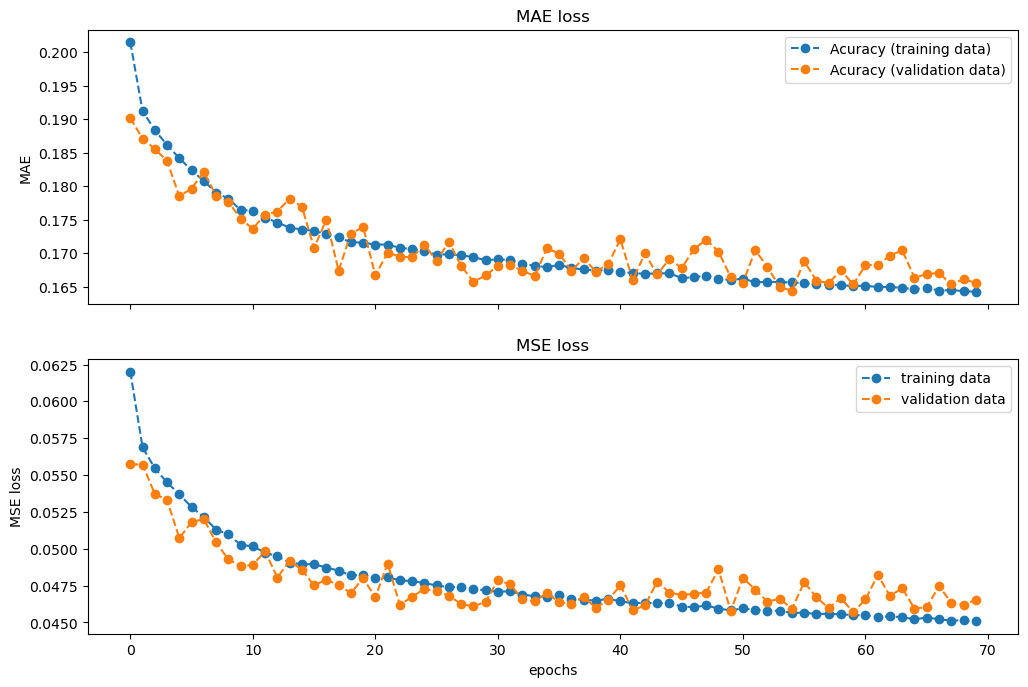

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8), dpi=100)

ax1.plot(hist.history['mae'], "o--", label='Acuracy (training data)')
ax1.plot(hist.history['val_mae'], "o--", label='Acuracy (validation data)')
ax1.set_title('MAE loss')
ax1.set_ylabel("MAE")
ax1.legend()

ax2.plot(hist.history['loss'], "o--", label='training data')
ax2.plot(hist.history['val_loss'], "o--", label='validation data')
ax2.set_title('MSE loss')
ax2.set_ylabel("MSE loss")
ax2.set_xlabel("epochs")
ax2.legend()

model_name_1 = model_name + ".hdf5"
model_1 = load_model(model_name_1)
model_1.evaluate(X_test, y_test)

In [24]:
#Some layer optimisation again
testing_layers = [[10,1],
                  [16,1],
                  [24,1],
                  [48,1],
                  [10,10,1],
                  [16,16,1],
                  [24,24,1],
                  [10,24,1],
                  [10,48,1],
                  [24,48,1],
                  [48,48,1],
                  [10,96,1],
                  [48,96,1],
                  [10,10,10,1],
                  [24,48,8,1],
                  [24,24,24,1],
                  [10,48,10,1],
                  [10,24,48,1],
                  [24,24,48,1],
                  [24,48,48,1],
                  [48,48,48,1],
                  [16,16,16,16,1],
                  [10,24,24,10,1],
                  [10,24,24,10,1]]

base_model_name = os.path.join(path_data, "nn_2000_queries_trimming_simple")
simple_models = []

for i, layers in enumerate(testing_layers):
    model_name_loop = f"{base_model_name}_{i}"
    
    # define the keras model
    nn_model_simple = Sequential()

    #add first layer
    nn_model_simple.add(Dense(layers[0], input_dim = X_train.shape[1], activation = 'relu'))
    #add other layers
    for i in range(1,len(layers)-1): #skip first and last one
        nn_model_simple.add(Dense(layers[i], activation = 'relu'))
    #add last layer
    nn_model_simple.add(Dense(layers[-1], activation = None))

    # compile the keras model
    nn_model_simple.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mae'])

    # save best model
    checkpointer = ModelCheckpoint(filepath= model_name_loop + ".hdf5", monitor='val_loss', verbose=1, save_best_only=True)
    earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)  # patience - try x more epochs to improve val_loss

    # fit the keras model on the dataset
    hist_simple = nn_model_simple.fit(X_train, y_train, epochs = 100, batch_size = 24, validation_data=(X_val, y_val),
                        callbacks = [checkpointer, earlystopper])
    simple_models.append((nn_model_simple, hist_simple, hist_simple.history['loss'][-1], hist_simple.history['val_loss'][-10]))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39984/40000 [============================>.] - ETA: 0s - loss: 0.0661 - mae: 0.2113
Epoch 00001: val_loss improved from inf to 0.06335, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_0.hdf5
40000/40000 [==============================] - 4s 95us/sample - loss: 0.0661 - mae: 0.2113 - val_loss: 0.0634 - val_mae: 0.2061
Epoch 2/100
39624/40000 [============================>.] - ETA: 0s - loss: 0.0600 - mae: 0.1992
Epoch 00002: val_loss improved from 0.06335 to 0.06228, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_0.hdf5
40000/40000 [==============================] - 3s 82us/sample - loss: 0.0600 - mae: 0.1992 - val_loss: 0.0623 - val_mae: 0.2019
Epoch 3/100
39624/40000 [============================>.] - ETA: 0s - loss: 0.0584 - mae: 0.1953
Epoch 00003: val_loss improved from 0.06228 to 0.05719, saving model to C:\Users\joris\Documents\eSc

39288/40000 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1814
Epoch 00052: val_loss improved from 0.05047 to 0.05045, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_0.hdf5
40000/40000 [==============================] - 4s 100us/sample - loss: 0.0516 - mae: 0.1814 - val_loss: 0.0504 - val_mae: 0.1809
Epoch 53/100
39480/40000 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1815
Epoch 00053: val_loss did not improve from 0.05045
40000/40000 [==============================] - 4s 90us/sample - loss: 0.0516 - mae: 0.1814 - val_loss: 0.0519 - val_mae: 0.1841
Epoch 54/100
39408/40000 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1814
Epoch 00054: val_loss did not improve from 0.05045
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0515 - mae: 0.1814 - val_loss: 0.0507 - val_mae: 0.1808
Epoch 55/100
39432/40000 [============================>.] - ETA: 0s - loss: 0.05

39360/40000 [============================>.] - ETA: 0s - loss: 0.0513 - mae: 0.1805
Epoch 00033: val_loss did not improve from 0.04996
40000/40000 [==============================] - 4s 106us/sample - loss: 0.0513 - mae: 0.1806 - val_loss: 0.0512 - val_mae: 0.1810
Epoch 34/100
39336/40000 [============================>.] - ETA: 0s - loss: 0.0513 - mae: 0.1805
Epoch 00034: val_loss improved from 0.04996 to 0.04991, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_1.hdf5
40000/40000 [==============================] - 4s 90us/sample - loss: 0.0513 - mae: 0.1804 - val_loss: 0.0499 - val_mae: 0.1777
Epoch 35/100
39312/40000 [============================>.] - ETA: 0s - loss: 0.0512 - mae: 0.1804
Epoch 00035: val_loss did not improve from 0.04991
40000/40000 [==============================] - 3s 81us/sample - loss: 0.0512 - mae: 0.1804 - val_loss: 0.0500 - val_mae: 0.1766
Epoch 36/100
39384/40000 [============================>.] - ETA: 0s - loss: 0.05

Epoch 62/100
39576/40000 [============================>.] - ETA: 0s - loss: 0.0507 - mae: 0.1792
Epoch 00062: val_loss did not improve from 0.04917
40000/40000 [==============================] - 4s 89us/sample - loss: 0.0507 - mae: 0.1792 - val_loss: 0.0496 - val_mae: 0.1789
Epoch 00062: early stopping
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39432/40000 [============================>.] - ETA: 0s - loss: 0.0660 - mae: 0.2104
Epoch 00001: val_loss improved from inf to 0.05979, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_2.hdf5
40000/40000 [==============================] - 4s 107us/sample - loss: 0.0659 - mae: 0.2102 - val_loss: 0.0598 - val_mae: 0.2013
Epoch 2/100
39360/40000 [============================>.] - ETA: 0s - loss: 0.0591 - mae: 0.1973
Epoch 00002: val_loss improved from 0.05979 to 0.05733, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_2.hdf5
40000/40000 [======

Epoch 25/100
39432/40000 [============================>.] - ETA: 0s - loss: 0.0513 - mae: 0.1804
Epoch 00025: val_loss improved from 0.04991 to 0.04984, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_2.hdf5
40000/40000 [==============================] - 3s 74us/sample - loss: 0.0513 - mae: 0.1804 - val_loss: 0.0498 - val_mae: 0.1774
Epoch 26/100
39288/40000 [============================>.] - ETA: 0s - loss: 0.0511 - mae: 0.1800
Epoch 00026: val_loss did not improve from 0.04984
40000/40000 [==============================] - 3s 76us/sample - loss: 0.0512 - mae: 0.1801 - val_loss: 0.0512 - val_mae: 0.1836
Epoch 27/100
39768/40000 [============================>.] - ETA: 0s - loss: 0.0511 - mae: 0.1801
Epoch 00027: val_loss did not improve from 0.04984
40000/40000 [==============================] - 3s 76us/sample - loss: 0.0511 - mae: 0.1801 - val_loss: 0.0504 - val_mae: 0.1785
Epoch 28/100
39672/40000 [============================>.] - ETA: 0s 

Epoch 23/100
39960/40000 [============================>.] - ETA: 0s - loss: 0.0499 - mae: 0.1770
Epoch 00023: val_loss did not improve from 0.04784
40000/40000 [==============================] - 4s 91us/sample - loss: 0.0499 - mae: 0.1769 - val_loss: 0.0487 - val_mae: 0.1735
Epoch 24/100
39720/40000 [============================>.] - ETA: 0s - loss: 0.0498 - mae: 0.1766
Epoch 00024: val_loss did not improve from 0.04784
40000/40000 [==============================] - 3s 74us/sample - loss: 0.0498 - mae: 0.1765 - val_loss: 0.0484 - val_mae: 0.1742
Epoch 25/100
39864/40000 [============================>.] - ETA: 0s - loss: 0.0496 - mae: 0.1763
Epoch 00025: val_loss did not improve from 0.04784
40000/40000 [==============================] - 3s 77us/sample - loss: 0.0496 - mae: 0.1762 - val_loss: 0.0488 - val_mae: 0.1737
Epoch 26/100
39984/40000 [============================>.] - ETA: 0s - loss: 0.0497 - mae: 0.1764
Epoch 00026: val_loss did not improve from 0.04784
40000/40000 [===========

39720/40000 [============================>.] - ETA: 0s - loss: 0.0497 - mae: 0.1750
Epoch 00045: val_loss did not improve from 0.04775
40000/40000 [==============================] - 3s 81us/sample - loss: 0.0497 - mae: 0.1750 - val_loss: 0.0480 - val_mae: 0.1716
Epoch 46/100
39768/40000 [============================>.] - ETA: 0s - loss: 0.0497 - mae: 0.1749
Epoch 00046: val_loss improved from 0.04775 to 0.04768, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_4.hdf5
40000/40000 [==============================] - 4s 91us/sample - loss: 0.0497 - mae: 0.1750 - val_loss: 0.0477 - val_mae: 0.1721
Epoch 47/100
39528/40000 [============================>.] - ETA: 0s - loss: 0.0498 - mae: 0.1752
Epoch 00047: val_loss improved from 0.04768 to 0.04753, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_4.hdf5
40000/40000 [==============================] - 3s 78us/sample - loss: 0.0498 - mae: 0.1751 - val_loss: 0.

Epoch 73/100
39504/40000 [============================>.] - ETA: 0s - loss: 0.0489 - mae: 0.1731
Epoch 00073: val_loss did not improve from 0.04695
40000/40000 [==============================] - 3s 75us/sample - loss: 0.0489 - mae: 0.1733 - val_loss: 0.0478 - val_mae: 0.1747
Epoch 74/100
39600/40000 [============================>.] - ETA: 0s - loss: 0.0489 - mae: 0.1730
Epoch 00074: val_loss did not improve from 0.04695
40000/40000 [==============================] - 3s 76us/sample - loss: 0.0490 - mae: 0.1731 - val_loss: 0.0472 - val_mae: 0.1718
Epoch 00074: early stopping
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39504/40000 [============================>.] - ETA: 0s - loss: 0.0656 - mae: 0.2093
Epoch 00001: val_loss improved from inf to 0.05684, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_5.hdf5
40000/40000 [==============================] - 4s 89us/sample - loss: 0.0656 - mae: 0.2091 - val_loss: 0.0568 - val_mae: 0.

Epoch 25/100
39360/40000 [============================>.] - ETA: 0s - loss: 0.0507 - mae: 0.1769
Epoch 00025: val_loss improved from 0.04875 to 0.04858, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_5.hdf5
40000/40000 [==============================] - 3s 76us/sample - loss: 0.0506 - mae: 0.1768 - val_loss: 0.0486 - val_mae: 0.1727
Epoch 26/100
39168/40000 [============================>.] - ETA: 0s - loss: 0.0506 - mae: 0.1766
Epoch 00026: val_loss did not improve from 0.04858
40000/40000 [==============================] - 3s 75us/sample - loss: 0.0506 - mae: 0.1766 - val_loss: 0.0499 - val_mae: 0.1781
Epoch 27/100
39576/40000 [============================>.] - ETA: 0s - loss: 0.0505 - mae: 0.1762
Epoch 00027: val_loss did not improve from 0.04858
40000/40000 [==============================] - 3s 75us/sample - loss: 0.0505 - mae: 0.1763 - val_loss: 0.0499 - val_mae: 0.1778
Epoch 28/100
39984/40000 [============================>.] - ETA: 0s 

Epoch 10/100
39624/40000 [============================>.] - ETA: 0s - loss: 0.0524 - mae: 0.1814
Epoch 00010: val_loss improved from 0.05062 to 0.04977, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_6.hdf5
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0523 - mae: 0.1814 - val_loss: 0.0498 - val_mae: 0.1770
Epoch 11/100
39576/40000 [============================>.] - ETA: 0s - loss: 0.0521 - mae: 0.1807
Epoch 00011: val_loss improved from 0.04977 to 0.04969, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_6.hdf5
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0521 - mae: 0.1807 - val_loss: 0.0497 - val_mae: 0.1778
Epoch 12/100
39744/40000 [============================>.] - ETA: 0s - loss: 0.0519 - mae: 0.1800
Epoch 00012: val_loss improved from 0.04969 to 0.04940, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_si

39240/40000 [============================>.] - ETA: 0s - loss: 0.0536 - mae: 0.1851
Epoch 00012: val_loss did not improve from 0.05176
40000/40000 [==============================] - 3s 79us/sample - loss: 0.0535 - mae: 0.1850 - val_loss: 0.0531 - val_mae: 0.1855
Epoch 13/100
39720/40000 [============================>.] - ETA: 0s - loss: 0.0533 - mae: 0.1844
Epoch 00013: val_loss did not improve from 0.05176
40000/40000 [==============================] - 4s 94us/sample - loss: 0.0533 - mae: 0.1844 - val_loss: 0.0518 - val_mae: 0.1830
Epoch 14/100
39816/40000 [============================>.] - ETA: 0s - loss: 0.0532 - mae: 0.1843
Epoch 00014: val_loss did not improve from 0.05176
40000/40000 [==============================] - 3s 85us/sample - loss: 0.0532 - mae: 0.1843 - val_loss: 0.0526 - val_mae: 0.1852
Epoch 15/100
39480/40000 [============================>.] - ETA: 0s - loss: 0.0532 - mae: 0.1842
Epoch 00015: val_loss improved from 0.05176 to 0.05138, saving model to C:\Users\joris\D

Epoch 39/100
39360/40000 [============================>.] - ETA: 0s - loss: 0.0504 - mae: 0.1768
Epoch 00039: val_loss improved from 0.04888 to 0.04858, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_7.hdf5
40000/40000 [==============================] - 4s 90us/sample - loss: 0.0503 - mae: 0.1768 - val_loss: 0.0486 - val_mae: 0.1729
Epoch 40/100
39816/40000 [============================>.] - ETA: 0s - loss: 0.0501 - mae: 0.1763
Epoch 00040: val_loss did not improve from 0.04858
40000/40000 [==============================] - 4s 89us/sample - loss: 0.0501 - mae: 0.1763 - val_loss: 0.0507 - val_mae: 0.1809
Epoch 41/100
39912/40000 [============================>.] - ETA: 0s - loss: 0.0500 - mae: 0.1760
Epoch 00041: val_loss did not improve from 0.04858
40000/40000 [==============================] - 3s 86us/sample - loss: 0.0500 - mae: 0.1759 - val_loss: 0.0487 - val_mae: 0.1750
Epoch 42/100
39576/40000 [============================>.] - ETA: 0s 

Epoch 14/100
39960/40000 [============================>.] - ETA: 0s - loss: 0.0505 - mae: 0.1777
Epoch 00014: val_loss improved from 0.04918 to 0.04830, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_8.hdf5
40000/40000 [==============================] - 3s 81us/sample - loss: 0.0505 - mae: 0.1777 - val_loss: 0.0483 - val_mae: 0.1742
Epoch 15/100
39384/40000 [============================>.] - ETA: 0s - loss: 0.0504 - mae: 0.1773
Epoch 00015: val_loss did not improve from 0.04830
40000/40000 [==============================] - 3s 80us/sample - loss: 0.0504 - mae: 0.1773 - val_loss: 0.0493 - val_mae: 0.1766
Epoch 16/100
39672/40000 [============================>.] - ETA: 0s - loss: 0.0500 - mae: 0.1762
Epoch 00016: val_loss did not improve from 0.04830
40000/40000 [==============================] - 3s 79us/sample - loss: 0.0500 - mae: 0.1763 - val_loss: 0.0500 - val_mae: 0.1769
Epoch 17/100
39768/40000 [============================>.] - ETA: 0s 

Epoch 42/100
39288/40000 [============================>.] - ETA: 0s - loss: 0.0487 - mae: 0.1729
Epoch 00042: val_loss did not improve from 0.04731
40000/40000 [==============================] - 3s 77us/sample - loss: 0.0487 - mae: 0.1730 - val_loss: 0.0500 - val_mae: 0.1775
Epoch 43/100
39360/40000 [============================>.] - ETA: 0s - loss: 0.0484 - mae: 0.1723
Epoch 00043: val_loss did not improve from 0.04731
40000/40000 [==============================] - 4s 90us/sample - loss: 0.0485 - mae: 0.1725 - val_loss: 0.0489 - val_mae: 0.1784
Epoch 44/100
39648/40000 [============================>.] - ETA: 0s - loss: 0.0487 - mae: 0.1727
Epoch 00044: val_loss did not improve from 0.04731
40000/40000 [==============================] - 4s 91us/sample - loss: 0.0487 - mae: 0.1728 - val_loss: 0.0483 - val_mae: 0.1757
Epoch 45/100
39864/40000 [============================>.] - ETA: 0s - loss: 0.0488 - mae: 0.1730
Epoch 00045: val_loss did not improve from 0.04731
40000/40000 [===========

Epoch 33/100
39360/40000 [============================>.] - ETA: 0s - loss: 0.0481 - mae: 0.1713
Epoch 00033: val_loss did not improve from 0.04656
40000/40000 [==============================] - 3s 74us/sample - loss: 0.0480 - mae: 0.1713 - val_loss: 0.0482 - val_mae: 0.1729
Epoch 00033: early stopping
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39336/40000 [============================>.] - ETA: 0s - loss: 0.0623 - mae: 0.2018
Epoch 00001: val_loss improved from inf to 0.05801, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_10.hdf5
40000/40000 [==============================] - 4s 91us/sample - loss: 0.0621 - mae: 0.2014 - val_loss: 0.0580 - val_mae: 0.1909
Epoch 2/100
39336/40000 [============================>.] - ETA: 0s - loss: 0.0566 - mae: 0.1907
Epoch 00002: val_loss improved from 0.05801 to 0.05338, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_10.hdf5
40000/40000 [=====

Epoch 25/100
39936/40000 [============================>.] - ETA: 0s - loss: 0.0478 - mae: 0.1701
Epoch 00025: val_loss improved from 0.04627 to 0.04618, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_10.hdf5
40000/40000 [==============================] - 6s 162us/sample - loss: 0.0477 - mae: 0.1700 - val_loss: 0.0462 - val_mae: 0.1656
Epoch 26/100
39648/40000 [============================>.] - ETA: 0s - loss: 0.0477 - mae: 0.1700
Epoch 00026: val_loss did not improve from 0.04618
40000/40000 [==============================] - 4s 88us/sample - loss: 0.0478 - mae: 0.1701 - val_loss: 0.0464 - val_mae: 0.1693
Epoch 27/100
39264/40000 [============================>.] - ETA: 0s - loss: 0.0478 - mae: 0.1702
Epoch 00027: val_loss did not improve from 0.04618
40000/40000 [==============================] - 3s 79us/sample - loss: 0.0478 - mae: 0.1701 - val_loss: 0.0467 - val_mae: 0.1677
Epoch 28/100
39984/40000 [============================>.] - ETA: 0

Epoch 12/100
39648/40000 [============================>.] - ETA: 0s - loss: 0.0512 - mae: 0.1791
Epoch 00012: val_loss improved from 0.05022 to 0.04954, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_11.hdf5
40000/40000 [==============================] - 3s 81us/sample - loss: 0.0512 - mae: 0.1790 - val_loss: 0.0495 - val_mae: 0.1770
Epoch 13/100
39984/40000 [============================>.] - ETA: 0s - loss: 0.0507 - mae: 0.1780
Epoch 00013: val_loss improved from 0.04954 to 0.04883, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_11.hdf5
40000/40000 [==============================] - 3s 81us/sample - loss: 0.0507 - mae: 0.1780 - val_loss: 0.0488 - val_mae: 0.1745
Epoch 14/100
39696/40000 [============================>.] - ETA: 0s - loss: 0.0505 - mae: 0.1774
Epoch 00014: val_loss did not improve from 0.04883
40000/40000 [==============================] - 3s 79us/sample - loss: 0.0505 - mae: 0.1773

Epoch 00039: early stopping
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39936/40000 [============================>.] - ETA: 0s - loss: 0.0608 - mae: 0.1993
Epoch 00001: val_loss improved from inf to 0.05464, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_12.hdf5
40000/40000 [==============================] - 5s 126us/sample - loss: 0.0609 - mae: 0.1993 - val_loss: 0.0546 - val_mae: 0.1875
Epoch 2/100
39840/40000 [============================>.] - ETA: 0s - loss: 0.0554 - mae: 0.1880
Epoch 00002: val_loss improved from 0.05464 to 0.05319, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_12.hdf5
40000/40000 [==============================] - 3s 87us/sample - loss: 0.0554 - mae: 0.1879 - val_loss: 0.0532 - val_mae: 0.1834
Epoch 3/100
39960/40000 [============================>.] - ETA: 0s - loss: 0.0540 - mae: 0.1849
Epoch 00003: val_loss did not improve from 0.05319
40000/40000 [=====

Epoch 27/100
39624/40000 [============================>.] - ETA: 0s - loss: 0.0470 - mae: 0.1686
Epoch 00027: val_loss did not improve from 0.04608
40000/40000 [==============================] - 3s 83us/sample - loss: 0.0471 - mae: 0.1687 - val_loss: 0.0477 - val_mae: 0.1737
Epoch 28/100
39264/40000 [============================>.] - ETA: 0s - loss: 0.0471 - mae: 0.1686
Epoch 00028: val_loss did not improve from 0.04608
40000/40000 [==============================] - 3s 85us/sample - loss: 0.0472 - mae: 0.1686 - val_loss: 0.0464 - val_mae: 0.1686
Epoch 29/100
39624/40000 [============================>.] - ETA: 0s - loss: 0.0471 - mae: 0.1685
Epoch 00029: val_loss did not improve from 0.04608
40000/40000 [==============================] - 4s 99us/sample - loss: 0.0471 - mae: 0.1685 - val_loss: 0.0461 - val_mae: 0.1676
Epoch 30/100
39672/40000 [============================>.] - ETA: 0s - loss: 0.0470 - mae: 0.1685
Epoch 00030: val_loss did not improve from 0.04608
40000/40000 [===========

Epoch 9/100
39840/40000 [============================>.] - ETA: 0s - loss: 0.0539 - mae: 0.1855
Epoch 00009: val_loss improved from 0.05254 to 0.05243, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_13.hdf5
40000/40000 [==============================] - 3s 83us/sample - loss: 0.0539 - mae: 0.1855 - val_loss: 0.0524 - val_mae: 0.1843
Epoch 10/100
39984/40000 [============================>.] - ETA: 0s - loss: 0.0534 - mae: 0.1846
Epoch 00010: val_loss improved from 0.05243 to 0.05192, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_13.hdf5
40000/40000 [==============================] - 4s 95us/sample - loss: 0.0534 - mae: 0.1846 - val_loss: 0.0519 - val_mae: 0.1811
Epoch 11/100
39816/40000 [============================>.] - ETA: 0s - loss: 0.0531 - mae: 0.1839
Epoch 00011: val_loss did not improve from 0.05192
40000/40000 [==============================] - 4s 91us/sample - loss: 0.0531 - mae: 0.1840 

Epoch 35/100
39792/40000 [============================>.] - ETA: 0s - loss: 0.0503 - mae: 0.1769
Epoch 00035: val_loss did not improve from 0.04789
40000/40000 [==============================] - 4s 92us/sample - loss: 0.0503 - mae: 0.1769 - val_loss: 0.0485 - val_mae: 0.1760
Epoch 36/100
39576/40000 [============================>.] - ETA: 0s - loss: 0.0502 - mae: 0.1768
Epoch 00036: val_loss improved from 0.04789 to 0.04778, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_13.hdf5
40000/40000 [==============================] - 4s 104us/sample - loss: 0.0502 - mae: 0.1768 - val_loss: 0.0478 - val_mae: 0.1725
Epoch 37/100
39624/40000 [============================>.] - ETA: 0s - loss: 0.0501 - mae: 0.1765
Epoch 00037: val_loss did not improve from 0.04778
40000/40000 [==============================] - 4s 110us/sample - loss: 0.0501 - mae: 0.1765 - val_loss: 0.0488 - val_mae: 0.1757
Epoch 38/100
39528/40000 [============================>.] - ETA: 

39768/40000 [============================>.] - ETA: 0s - loss: 0.0520 - mae: 0.1801
Epoch 00011: val_loss did not improve from 0.05003
40000/40000 [==============================] - 3s 82us/sample - loss: 0.0520 - mae: 0.1800 - val_loss: 0.0503 - val_mae: 0.1768
Epoch 12/100
39888/40000 [============================>.] - ETA: 0s - loss: 0.0518 - mae: 0.1792
Epoch 00012: val_loss did not improve from 0.05003
40000/40000 [==============================] - 3s 81us/sample - loss: 0.0518 - mae: 0.1793 - val_loss: 0.0518 - val_mae: 0.1854
Epoch 13/100
39936/40000 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1789
Epoch 00013: val_loss did not improve from 0.05003
40000/40000 [==============================] - 4s 103us/sample - loss: 0.0515 - mae: 0.1788 - val_loss: 0.0507 - val_mae: 0.1757
Epoch 14/100
39984/40000 [============================>.] - ETA: 0s - loss: 0.0512 - mae: 0.1779
Epoch 00014: val_loss improved from 0.05003 to 0.04951, saving model to C:\Users\joris\

Epoch 00038: early stopping
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39792/40000 [============================>.] - ETA: 0s - loss: 0.0651 - mae: 0.2062
Epoch 00001: val_loss improved from inf to 0.05872, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_15.hdf5
40000/40000 [==============================] - 6s 150us/sample - loss: 0.0651 - mae: 0.2061 - val_loss: 0.0587 - val_mae: 0.1950
Epoch 2/100
39264/40000 [============================>.] - ETA: 0s - loss: 0.0575 - mae: 0.1928
Epoch 00002: val_loss improved from 0.05872 to 0.05423, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_15.hdf5
40000/40000 [==============================] - 3s 86us/sample - loss: 0.0575 - mae: 0.1928 - val_loss: 0.0542 - val_mae: 0.1880
Epoch 3/100
39840/40000 [============================>.] - ETA: 0s - loss: 0.0560 - mae: 0.1894
Epoch 00003: val_loss improved from 0.05423 to 0.05262, saving model 

Epoch 27/100
39960/40000 [============================>.] - ETA: 0s - loss: 0.0485 - mae: 0.1714
Epoch 00027: val_loss improved from 0.04761 to 0.04761, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_15.hdf5
40000/40000 [==============================] - 3s 85us/sample - loss: 0.0485 - mae: 0.1714 - val_loss: 0.0476 - val_mae: 0.1706
Epoch 28/100
39432/40000 [============================>.] - ETA: 0s - loss: 0.0484 - mae: 0.1714
Epoch 00028: val_loss did not improve from 0.04761
40000/40000 [==============================] - 3s 83us/sample - loss: 0.0484 - mae: 0.1713 - val_loss: 0.0482 - val_mae: 0.1713
Epoch 29/100
39792/40000 [============================>.] - ETA: 0s - loss: 0.0483 - mae: 0.1713
Epoch 00029: val_loss improved from 0.04761 to 0.04758, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_15.hdf5
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0483 - mae: 0.1713

39768/40000 [============================>.] - ETA: 0s - loss: 0.0466 - mae: 0.1675
Epoch 00054: val_loss did not improve from 0.04639
40000/40000 [==============================] - 3s 82us/sample - loss: 0.0466 - mae: 0.1675 - val_loss: 0.0478 - val_mae: 0.1691
Epoch 55/100
39360/40000 [============================>.] - ETA: 0s - loss: 0.0468 - mae: 0.1677
Epoch 00055: val_loss did not improve from 0.04639
40000/40000 [==============================] - 3s 86us/sample - loss: 0.0468 - mae: 0.1677 - val_loss: 0.0490 - val_mae: 0.1740
Epoch 00055: early stopping
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39696/40000 [============================>.] - ETA: 0s - loss: 0.0651 - mae: 0.2070
Epoch 00001: val_loss improved from inf to 0.05585, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_16.hdf5
40000/40000 [==============================] - 4s 100us/sample - loss: 0.0650 - mae: 0.2069 - val_loss: 0.0559 - val_mae: 0.1911
Epoch 

39288/40000 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1781
Epoch 00015: val_loss improved from 0.04994 to 0.04935, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_17.hdf5
40000/40000 [==============================] - 3s 83us/sample - loss: 0.0515 - mae: 0.1781 - val_loss: 0.0494 - val_mae: 0.1750
Epoch 16/100
39504/40000 [============================>.] - ETA: 0s - loss: 0.0513 - mae: 0.1776
Epoch 00016: val_loss did not improve from 0.04935
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0512 - mae: 0.1774 - val_loss: 0.0502 - val_mae: 0.1752
Epoch 17/100
39696/40000 [============================>.] - ETA: 0s - loss: 0.0510 - mae: 0.1769
Epoch 00017: val_loss did not improve from 0.04935
40000/40000 [==============================] - 3s 82us/sample - loss: 0.0510 - mae: 0.1769 - val_loss: 0.0519 - val_mae: 0.1799
Epoch 18/100
39864/40000 [============================>.] - ETA: 0s - loss: 0.05

Epoch 6/100
39696/40000 [============================>.] - ETA: 0s - loss: 0.0535 - mae: 0.1829
Epoch 00006: val_loss did not improve from 0.05255
40000/40000 [==============================] - 3s 83us/sample - loss: 0.0535 - mae: 0.1828 - val_loss: 0.0529 - val_mae: 0.1837
Epoch 7/100
39408/40000 [============================>.] - ETA: 0s - loss: 0.0526 - mae: 0.1811
Epoch 00007: val_loss improved from 0.05255 to 0.05089, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_18.hdf5
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0527 - mae: 0.1811 - val_loss: 0.0509 - val_mae: 0.1778
Epoch 8/100
39576/40000 [============================>.] - ETA: 0s - loss: 0.0518 - mae: 0.1793
Epoch 00008: val_loss improved from 0.05089 to 0.04879, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_18.hdf5
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0518 - mae: 0.1794 - 

Epoch 7/100
39384/40000 [============================>.] - ETA: 0s - loss: 0.0520 - mae: 0.1795
Epoch 00007: val_loss improved from 0.05053 to 0.04918, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_19.hdf5
40000/40000 [==============================] - 3s 86us/sample - loss: 0.0520 - mae: 0.1794 - val_loss: 0.0492 - val_mae: 0.1753
Epoch 8/100
39624/40000 [============================>.] - ETA: 0s - loss: 0.0514 - mae: 0.1779
Epoch 00008: val_loss did not improve from 0.04918
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0514 - mae: 0.1780 - val_loss: 0.0524 - val_mae: 0.1846
Epoch 9/100
39648/40000 [============================>.] - ETA: 0s - loss: 0.0510 - mae: 0.1770
Epoch 00009: val_loss improved from 0.04918 to 0.04867, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_19.hdf5
40000/40000 [==============================] - 3s 86us/sample - loss: 0.0510 - mae: 0.1771 - 

39840/40000 [============================>.] - ETA: 0s - loss: 0.0478 - mae: 0.1698
Epoch 00034: val_loss did not improve from 0.04701
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0478 - mae: 0.1698 - val_loss: 0.0483 - val_mae: 0.1694
Epoch 35/100
39456/40000 [============================>.] - ETA: 0s - loss: 0.0478 - mae: 0.1698
Epoch 00035: val_loss did not improve from 0.04701
40000/40000 [==============================] - 3s 82us/sample - loss: 0.0478 - mae: 0.1697 - val_loss: 0.0496 - val_mae: 0.1726
Epoch 36/100
39960/40000 [============================>.] - ETA: 0s - loss: 0.0478 - mae: 0.1695
Epoch 00036: val_loss did not improve from 0.04701
40000/40000 [==============================] - 3s 83us/sample - loss: 0.0478 - mae: 0.1695 - val_loss: 0.0478 - val_mae: 0.1692
Epoch 00036: early stopping
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39600/40000 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.1994
Epoch 00001

Epoch 2/100
39864/40000 [============================>.] - ETA: 0s - loss: 0.0577 - mae: 0.1932
Epoch 00002: val_loss improved from 0.05845 to 0.05455, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_21.hdf5
40000/40000 [==============================] - 3s 86us/sample - loss: 0.0577 - mae: 0.1932 - val_loss: 0.0546 - val_mae: 0.1888
Epoch 3/100
39528/40000 [============================>.] - ETA: 0s - loss: 0.0559 - mae: 0.1893
Epoch 00003: val_loss did not improve from 0.05455
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0559 - mae: 0.1893 - val_loss: 0.0547 - val_mae: 0.1878
Epoch 4/100
39936/40000 [============================>.] - ETA: 0s - loss: 0.0553 - mae: 0.1876
Epoch 00004: val_loss improved from 0.05455 to 0.05361, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_21.hdf5
40000/40000 [==============================] - 3s 83us/sample - loss: 0.0553 - mae: 0.1877 - 

Epoch 29/100
39456/40000 [============================>.] - ETA: 0s - loss: 0.0489 - mae: 0.1723
Epoch 00029: val_loss did not improve from 0.04747
40000/40000 [==============================] - 3s 87us/sample - loss: 0.0488 - mae: 0.1722 - val_loss: 0.0497 - val_mae: 0.1759
Epoch 30/100
39336/40000 [============================>.] - ETA: 0s - loss: 0.0490 - mae: 0.1726
Epoch 00030: val_loss did not improve from 0.04747
40000/40000 [==============================] - 3s 84us/sample - loss: 0.0489 - mae: 0.1725 - val_loss: 0.0479 - val_mae: 0.1697
Epoch 31/100
39312/40000 [============================>.] - ETA: 0s - loss: 0.0487 - mae: 0.1721
Epoch 00031: val_loss did not improve from 0.04747
40000/40000 [==============================] - 3s 83us/sample - loss: 0.0488 - mae: 0.1723 - val_loss: 0.0490 - val_mae: 0.1774
Epoch 00031: early stopping
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39408/40000 [============================>.] - ETA: 0s - loss: 0.0680 - mae: 0.211

Epoch 6/100
39576/40000 [============================>.] - ETA: 0s - loss: 0.0537 - mae: 0.1837
Epoch 00006: val_loss improved from 0.05267 to 0.05143, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_23.hdf5
40000/40000 [==============================] - 3s 86us/sample - loss: 0.0538 - mae: 0.1838 - val_loss: 0.0514 - val_mae: 0.1825
Epoch 7/100
39336/40000 [============================>.] - ETA: 0s - loss: 0.0531 - mae: 0.1823
Epoch 00007: val_loss did not improve from 0.05143
40000/40000 [==============================] - 3s 87us/sample - loss: 0.0532 - mae: 0.1823 - val_loss: 0.0520 - val_mae: 0.1822
Epoch 8/100
39936/40000 [============================>.] - ETA: 0s - loss: 0.0527 - mae: 0.1810
Epoch 00008: val_loss improved from 0.05143 to 0.05084, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_23.hdf5
40000/40000 [==============================] - 3s 85us/sample - loss: 0.0527 - mae: 0.1810 - 

Epoch 33/100
39840/40000 [============================>.] - ETA: 0s - loss: 0.0497 - mae: 0.1738
Epoch 00033: val_loss did not improve from 0.04813
40000/40000 [==============================] - 3s 85us/sample - loss: 0.0497 - mae: 0.1737 - val_loss: 0.0492 - val_mae: 0.1731
Epoch 34/100
39576/40000 [============================>.] - ETA: 0s - loss: 0.0496 - mae: 0.1736
Epoch 00034: val_loss did not improve from 0.04813
40000/40000 [==============================] - 3s 86us/sample - loss: 0.0496 - mae: 0.1735 - val_loss: 0.0492 - val_mae: 0.1701
Epoch 35/100
39792/40000 [============================>.] - ETA: 0s - loss: 0.0495 - mae: 0.1733
Epoch 00035: val_loss did not improve from 0.04813
40000/40000 [==============================] - 4s 93us/sample - loss: 0.0495 - mae: 0.1734 - val_loss: 0.0489 - val_mae: 0.1742
Epoch 36/100
39672/40000 [============================>.] - ETA: 0s - loss: 0.0496 - mae: 0.1735
Epoch 00036: val_loss did not improve from 0.04813
40000/40000 [===========

In [25]:
min_val_loss = (0, 1)
for i, layers in enumerate(testing_layers):
    simp_model, hist_simp, train_loss, val_loss = simple_models[i]
    if val_loss < min_val_loss[1]:
        min_val_loss = (i, val_loss)
    print(f"Model {i}, Train loss: {hist_simp.history['loss'][-10]:.4f}, Val loss: {val_loss:.4f}")

print(f"Best model: {min_val_loss[0]}, it has {testing_layers[min_val_loss[0]]} layers")

Model 0, Train loss: 0.0513, Val loss: 0.0505
Model 1, Train loss: 0.0507, Val loss: 0.0545
Model 2, Train loss: 0.0503, Val loss: 0.0493
Model 3, Train loss: 0.0495, Val loss: 0.0499
Model 4, Train loss: 0.0490, Val loss: 0.0472
Model 5, Train loss: 0.0500, Val loss: 0.0483
Model 6, Train loss: 0.0482, Val loss: 0.0471
Model 7, Train loss: 0.0488, Val loss: 0.0477
Model 8, Train loss: 0.0479, Val loss: 0.0479
Model 9, Train loss: 0.0480, Val loss: 0.0472
Model 10, Train loss: 0.0469, Val loss: 0.0464
Model 11, Train loss: 0.0482, Val loss: 0.0471
Model 12, Train loss: 0.0457, Val loss: 0.0470
Model 13, Train loss: 0.0497, Val loss: 0.0488
Model 14, Train loss: 0.0487, Val loss: 0.0496
Model 15, Train loss: 0.0468, Val loss: 0.0467
Model 16, Train loss: 0.0490, Val loss: 0.0499
Model 17, Train loss: 0.0492, Val loss: 0.0492
Model 18, Train loss: 0.0481, Val loss: 0.0511
Model 19, Train loss: 0.0478, Val loss: 0.0483
Model 20, Train loss: 0.0472, Val loss: 0.0471
Model 21, Train loss: 0

### Best simple model

In [46]:
# load the best model: #10
base_model_name = os.path.join(path_data, "nn_2000_queries_trimming_simple")
best_model_name = f"{base_model_name}_10.hdf5"
print(best_model_name)
print("Evaluation on test set")
best_model = load_model(best_model_name)
best_model.evaluate(X_test, y_test)

C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_10.hdf5
Evaluation on test set
30000/30000 [==============================] - 1s 35us/sample - loss: 0.0488 - mae: 0.1706


[0.04878429824113846, 0.17055081]

C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_simple_10_hist.pickle


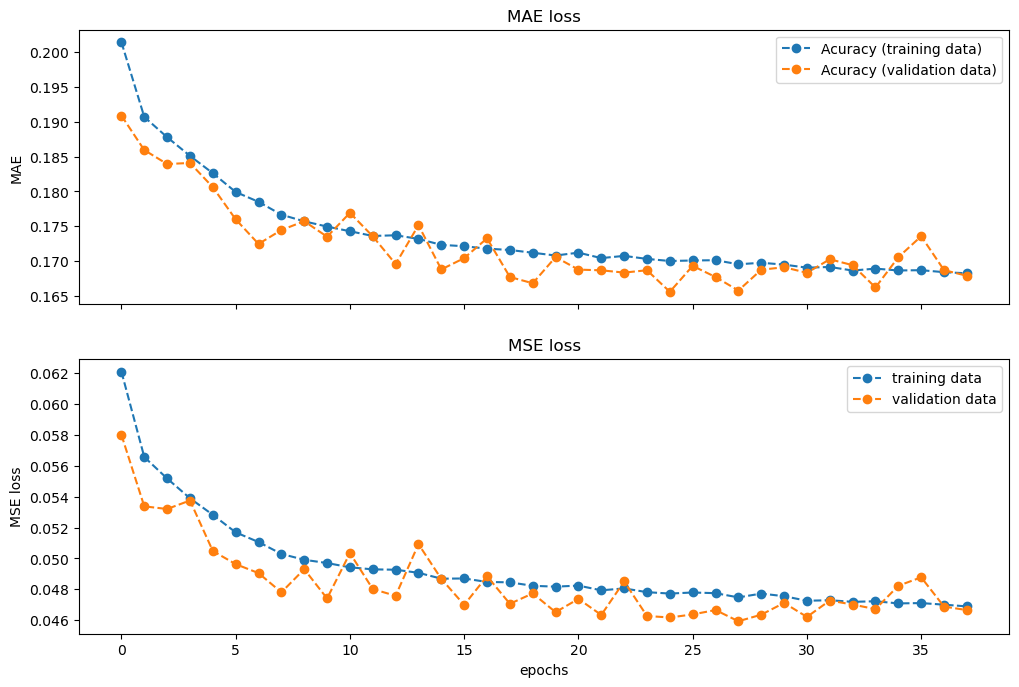

In [36]:
# save best model hist
base_model_name = os.path.join(path_data, "nn_2000_queries_trimming_simple")
hist_save = f"{base_model_name}_10_hist.pickle"
print(hist_save)
if not os.path.isfile(hist_save):
    with open(hist_save, 'wb') as outf:
        pickle.dump(simple_models[10][1].history, outf)
else:
    with open(hist_save, 'rb') as inf:
        best_model_hist = pickle.load(inf)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8), dpi=100)

ax1.plot(best_model_hist['mae'], "o--", label='Acuracy (training data)')
ax1.plot(best_model_hist['val_mae'], "o--", label='Acuracy (validation data)')
ax1.set_title('MAE loss')
ax1.set_ylabel("MAE")
ax1.legend()

ax2.plot(best_model_hist['loss'], "o--", label='training data')
ax2.plot(best_model_hist['val_loss'], "o--", label='validation data')
ax2.set_title('MSE loss')
ax2.set_ylabel("MSE loss")
ax2.set_xlabel("epochs")
ax2.legend()

### L1 regularisation

In [28]:
layersl1 = [48,48,48,48,48,1]
model_namel1 = os.path.join(path_data, "nn_2000_queries_trimming_l1")
l1_val = 0.001

# define the keras model
nn_modell1 = Sequential()

#add first layer
nn_modell1.add(Dense(layersl1[0], input_dim = X_train.shape[1], activation = 'relu', activity_regularizer=l1(l1_val)))
#add other layers
for i in range(1,len(layersl1)-1): #skip first and last one
    nn_modell1.add(Dense(layersl1[i], activation = 'relu', activity_regularizer=l1(l1_val)))
#add last layer
nn_modell1.add(Dense(layersl1[-1], activation = None,activity_regularizer=l1(l1_val)))

# compile the keras model
nn_modell1.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mae'])

# save best model
checkpointer = ModelCheckpoint(filepath= model_namel1 + ".hdf5", monitor='val_loss', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)  # patience - try x more epochs to improve val_loss

# fit the keras model on the dataset
histl1 = nn_modell1.fit(X_train, y_train, epochs = 100, batch_size = 30, validation_data=(X_val, y_val),
                    callbacks = [checkpointer, earlystopper])
historyl1 = histl1.history

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39660/40000 [============================>.] - ETA: 0s - loss: 0.0682 - mae: 0.1986
Epoch 00001: val_loss improved from inf to 0.05995, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_l1.hdf5
40000/40000 [==============================] - 5s 133us/sample - loss: 0.0681 - mae: 0.1985 - val_loss: 0.0599 - val_mae: 0.1865
Epoch 2/100
39840/40000 [============================>.] - ETA: 0s - loss: 0.0597 - mae: 0.1873
Epoch 00002: val_loss improved from 0.05995 to 0.05803, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_l1.hdf5
40000/40000 [==============================] - 4s 99us/sample - loss: 0.0597 - mae: 0.1873 - val_loss: 0.0580 - val_mae: 0.1851
Epoch 3/100
39540/40000 [============================>.] - ETA: 0s - loss: 0.0575 - mae: 0.1836
Epoch 00003: val_loss did not improve from 0.05803
40000/40000 [==============================] - 4s 92us/sampl

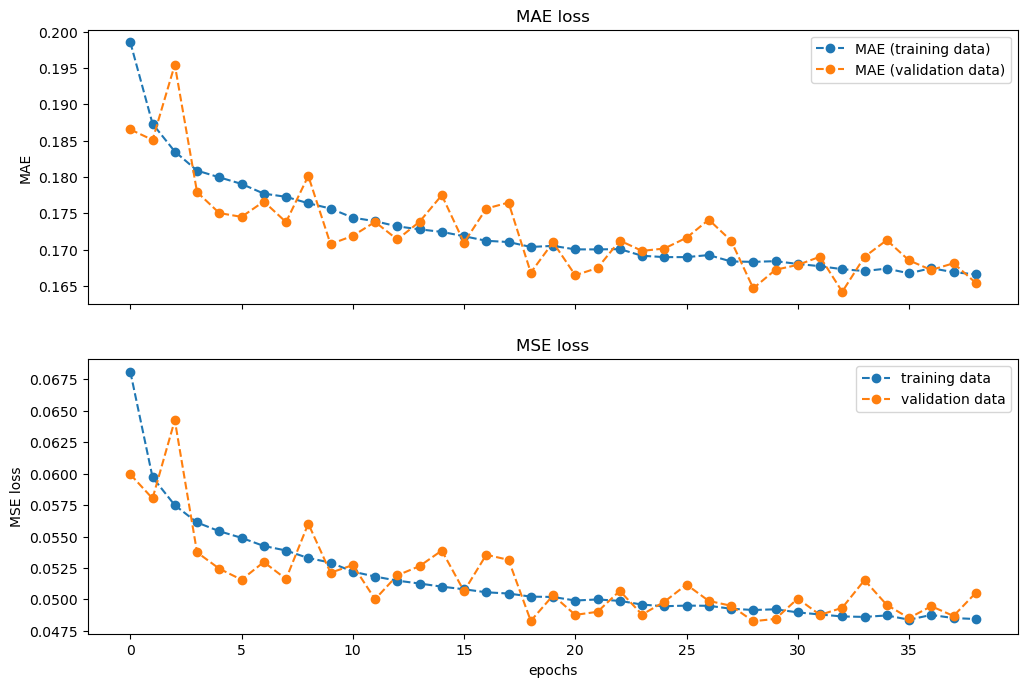

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8), dpi=100)

ax1.plot(histl1.history['mae'], "o--", label='MAE (training data)')
ax1.plot(histl1.history['val_mae'], "o--", label='MAE (validation data)')
ax1.set_title('MAE loss')
ax1.set_ylabel("MAE")
ax1.legend()

ax2.plot(histl1.history['loss'], "o--", label='training data')
ax2.plot(histl1.history['val_loss'], "o--", label='validation data')
ax2.set_title('MSE loss')
ax2.set_ylabel("MSE loss")
ax2.set_xlabel("epochs")
ax2.legend()

### Dropout regularisation

In [37]:
layers2 = [500,500,1]
model_name2 = os.path.join(path_data, "nn_2000_queries_trimming_big_dropout")
drop_rate = 0.25

# define the keras model
#nn_model2 = Sequential()
nn_input = Input(shape=X_train.shape[1])

#add first layer
nn_layers = Dense(layers2[0], activation = 'relu')(nn_input)
nn_layers = Dropout(drop_rate)(nn_layers, training = True)  # 'hack': let dropout layer believe its always training mode
#add other layers
for i in range(1,len(layers2)-1): #skip first and last one
    nn_layers = Dense(layers2[i], activation = 'relu')(nn_layers)
    nn_layers = Dropout(drop_rate)(nn_layers, training = True)
#add last layer
nn_layers = Dense(layers2[-1], activation = None)(nn_layers)

# compile the keras model
nn_model2 = Model(inputs=[nn_input], outputs=[nn_layers])
nn_model2.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mae'])

# save best model
checkpointer = ModelCheckpoint(filepath= model_name2 + ".hdf5", monitor='val_loss', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)  # patience - try x more epochs to improve val_loss

# fit the keras model on the dataset
hist2 = nn_model2.fit(X_train, y_train, epochs = 100, batch_size = 24, validation_data=(X_val, y_val),
                    callbacks = [checkpointer, earlystopper])
history2 = hist2.history

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
39960/40000 [============================>.] - ETA: 0s - loss: 0.0640 - mae: 0.2034
Epoch 00001: val_loss improved from inf to 0.05901, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_big_dropout.hdf5
40000/40000 [==============================] - 11s 283us/sample - loss: 0.0640 - mae: 0.2034 - val_loss: 0.0590 - val_mae: 0.1948
Epoch 2/100
39912/40000 [============================>.] - ETA: 0s - loss: 0.0594 - mae: 0.1952
Epoch 00002: val_loss improved from 0.05901 to 0.05632, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_big_dropout.hdf5
40000/40000 [==============================] - 9s 227us/sample - loss: 0.0594 - mae: 0.1951 - val_loss: 0.0563 - val_mae: 0.1914
Epoch 3/100
39744/40000 [============================>.] - ETA: 0s - loss: 0.0577 - mae: 0.1922
Epoch 00003: val_loss improved from 0.05632 to 0.05588, saving model to C:\Users\joris\Docu

Epoch 27/100
39768/40000 [============================>.] - ETA: 0s - loss: 0.0508 - mae: 0.1776
Epoch 00027: val_loss improved from 0.04949 to 0.04886, saving model to C:\Users\joris\Documents\eScience_data\data\nn_2000_queries_trimming_big_dropout.hdf5
40000/40000 [==============================] - 9s 222us/sample - loss: 0.0508 - mae: 0.1775 - val_loss: 0.0489 - val_mae: 0.1719
Epoch 28/100
39768/40000 [============================>.] - ETA: 0s - loss: 0.0507 - mae: 0.1773
Epoch 00028: val_loss did not improve from 0.04886
40000/40000 [==============================] - 8s 209us/sample - loss: 0.0506 - mae: 0.1772 - val_loss: 0.0496 - val_mae: 0.1738
Epoch 29/100
39912/40000 [============================>.] - ETA: 0s - loss: 0.0505 - mae: 0.1767
Epoch 00029: val_loss did not improve from 0.04886
40000/40000 [==============================] - 8s 210us/sample - loss: 0.0505 - mae: 0.1767 - val_loss: 0.0493 - val_mae: 0.1765
Epoch 30/100
39888/40000 [============================>.] - ET

Epoch 00055: early stopping


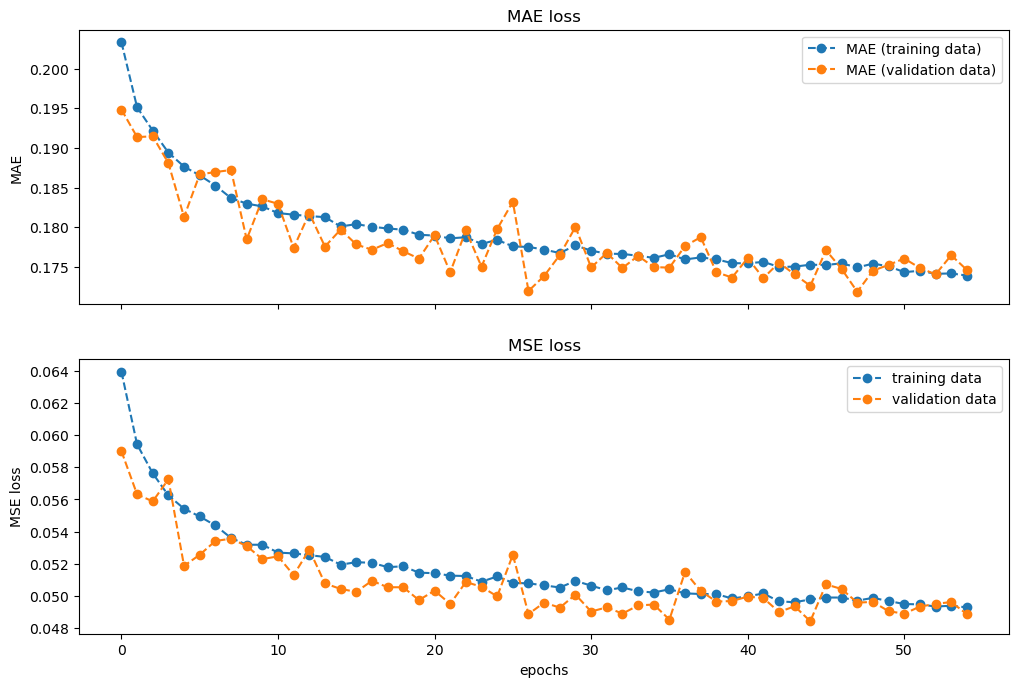

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8), dpi=100)

ax1.plot(hist2.history['mae'], "o--", label='MAE (training data)')
ax1.plot(hist2.history['val_mae'], "o--", label='MAE (validation data)')
ax1.set_title('MAE loss')
ax1.set_ylabel("MAE")
ax1.legend()

ax2.plot(hist2.history['loss'], "o--", label='training data')
ax2.plot(hist2.history['val_loss'], "o--", label='validation data')
ax2.set_title('MSE loss')
ax2.set_ylabel("MSE loss")
ax2.set_xlabel("epochs")
ax2.legend()